## **Day 11 of 30 days Data Analysis** 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [11]:
# Load the cleaned dataset from day 10 
df = pd.read_csv ("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\week02_sql\\supermarket_final_analysis_d10.csv")

# First look at the dataset
df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,cogs,gross income,Rating,Payment_Credit card,Payment_Ewallet,City_Naypyitaw,City_Yangon
0,750-67-8428,Alex,0,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,NaN,522.83,26.1415,9.1,False,True,False,True
1,226-31-3081,Giza,1,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,NaN,76.40,3.8200,9.6,False,False,True,False
2,631-41-3108,Alex,1,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,NaN,324.31,16.2155,7.4,True,False,False,True
3,123-19-1176,Alex,0,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,NaN,465.76,23.2880,8.4,False,True,False,True
4,373-73-7910,Alex,0,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,NaN,604.17,30.2085,5.3,False,True,False,True


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Invoice ID           1000 non-null   object 
 1   Branch               1000 non-null   object 
 2   Customer type        1000 non-null   int64  
 3   Gender               1000 non-null   object 
 4   Product line         1000 non-null   object 
 5   Unit price           1000 non-null   float64
 6   Quantity             1000 non-null   int64  
 7   Tax 5%               1000 non-null   float64
 8   Sales                1000 non-null   float64
 9   Date                 1000 non-null   object 
 10  Time                 1000 non-null   object 
 11  cogs                 1000 non-null   float64
 12  gross income         1000 non-null   float64
 13  Rating               1000 non-null   float64
 14  Payment_Credit card  1000 non-null   bool   
 15  Payment_Ewallet      1000 non-null   bo

,Customer type,Unit price,Quantity,Tax 5%,Sales,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,0.435000,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,0.496005,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,0.000000,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,0.000000,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,0.000000,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,1.000000,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,1.000000,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


In [4]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include = ["int64", "float64"]).columns
print("Numeric columns: ", numeric_cols)

# Identify categorical columns
categorical_cols = df.select_dtypes(include= ["object", "bool"]).columns
print("Categorical columns: ", categorical_cols)

Numeric columns:  Index(['Customer type', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs',
       'gross income', 'Rating'],
      dtype='object')
Categorical columns:  Index(['Invoice ID', 'Branch', 'Gender', 'Product line', 'Date', 'Time',
       'Payment_Credit card', 'Payment_Ewallet', 'City_Naypyitaw',
       'City_Yangon'],
      dtype='object')


In [5]:
df[numeric_cols].describe()

,Customer type,Unit price,Quantity,Tax 5%,Sales,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,0.435000,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,0.496005,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,0.000000,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,0.000000,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,0.000000,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,1.000000,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,1.000000,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


### ***Analysis of Numeric Columns:***

***- Customer type →*** *Contains only 0 and* 1 values, meaning it's an encoded categorical variable. Mean value is 0.435, so about 43.5% of customers are type "1" and the rest are type "0".*

***- Unit price →*** *Average is about 55.67, with a range from 10.08 to 99.96. Standard deviation is 26.49, indicating high price variability and a wide range of product prices.*

***- Quantity →*** *Average quantity is 5.51, with a maximum of 10. Data is skewed toward lower quantities.*

***- Tax 5%, Sales, cogs, gross income →*** *All are strongly related (Tax 5% is exactly 5% of Sales, and cogs/gross income are derived from it). Relatively high dispersion.*

***- Rating →*** *Average rating is 6.97 out of 10, minimum is 4, and maximum is 10. Most ratings are around 7.*

In [6]:
for col in categorical_cols:
    print(f"\nValue counts for {col}: ")
    print(df[col].value_counts())


Value counts for Invoice ID: 
Invoice ID
750-67-8428    1
226-31-3081    1
631-41-3108    1
123-19-1176    1
373-73-7910    1
              ..
233-67-5758    1
303-96-2227    1
727-02-1313    1
347-56-2442    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64

Value counts for Branch: 
Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

Value counts for Gender: 
Gender
Female    571
Male      429
Name: count, dtype: int64

Value counts for Product line: 
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Value counts for Date: 
Date
02-07-19     20
2/15/2019    19
03-02-19     18
01-08-19     18
3/14/2019    18
             ..
02-01-19      6
01-04-19      6
3/21/2019     6
2/21/2019     6
3/17/2019     6
Name: count, Length: 89, dtype: int64

Value counts for Time: 
Time
7:48:00 PM    7
2:

### ***Analysis for Categorical Columns:***

***- Invoice ID →*** *All values are unique, so it serves only as an identifier and isn't useful for statistical analysis.*

***- Branch →*** *Fairly balanced: Alex (340), Cairo (332), Giza (328).*

***- Gender →*** *Should be checked to see if the distribution is approximately equal (you have the complete output to compare).*

***- Product line →*** *Useful for analyzing product diversity and identifying which product line generates the most sales.*

***- Date and Time →*** *Not yet converted to datetime, but will be important for seasonal and hourly analysis.*

***- Payment_Credit card / Payment_Ewallet / City_Naypyitaw / City_Yangon →*** *These are binary variables. Their distribution shows which payment method or city has more representation.*

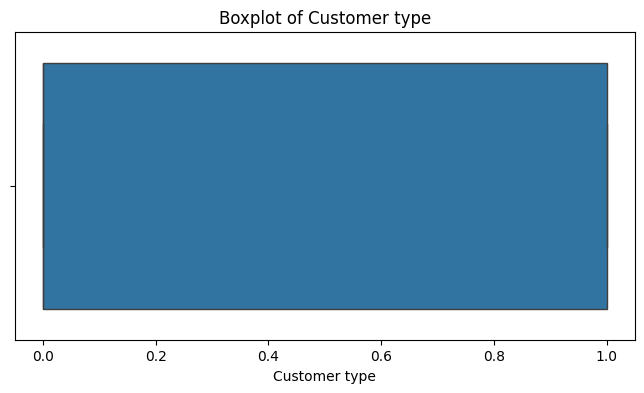

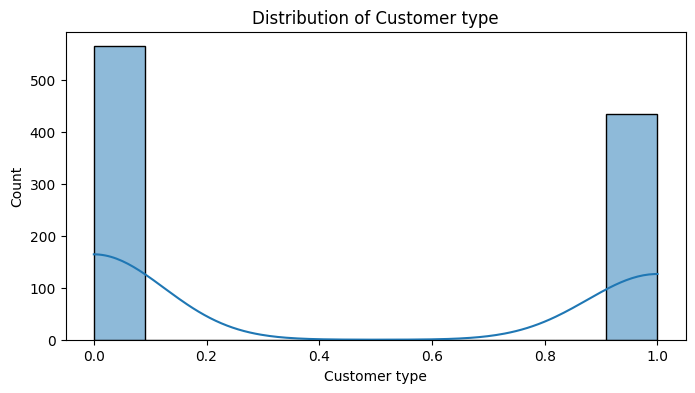

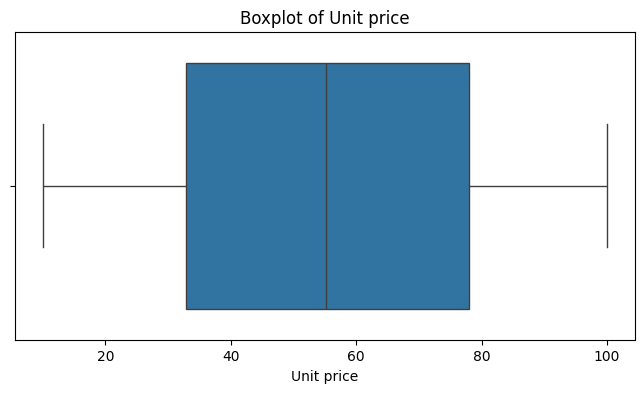

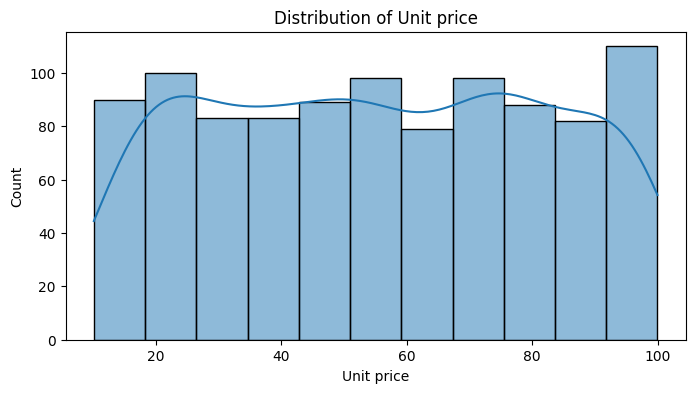

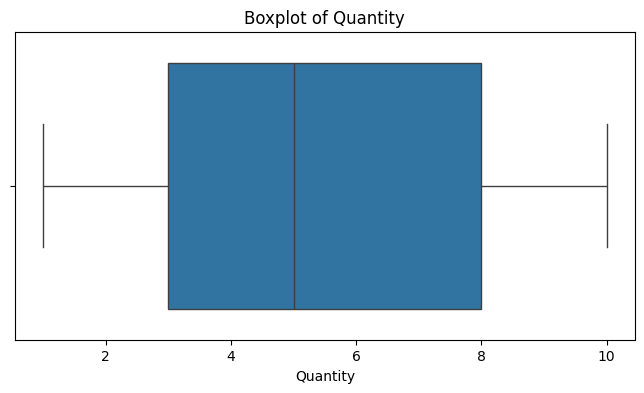

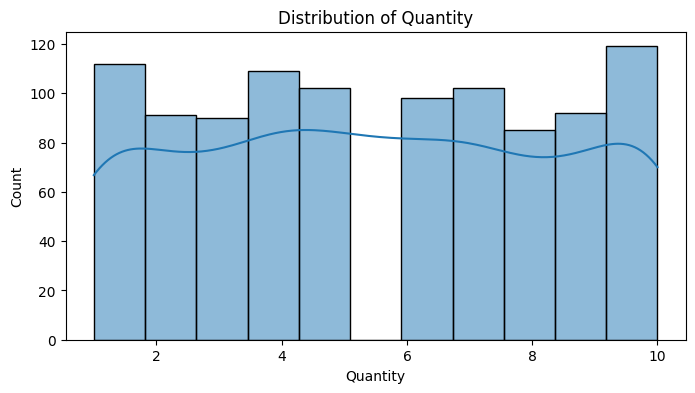

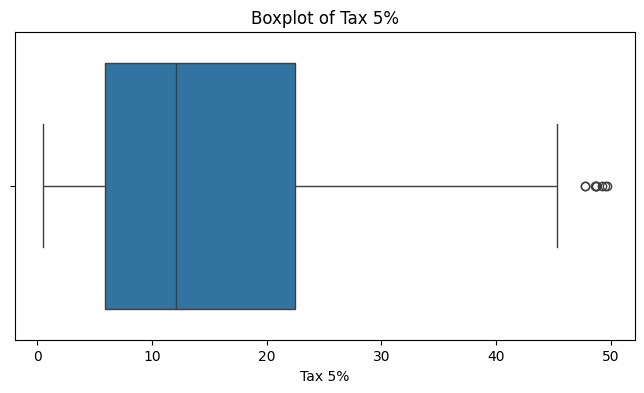

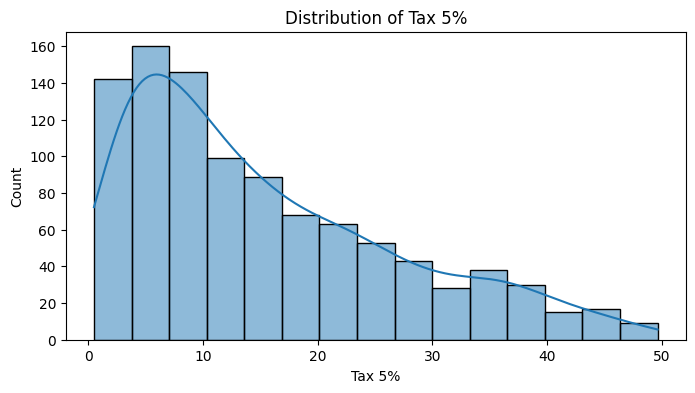

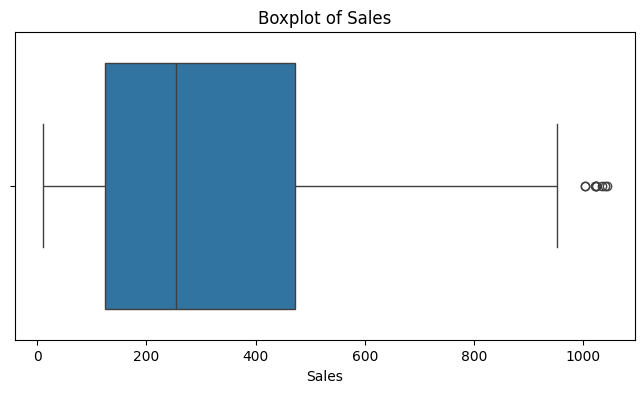

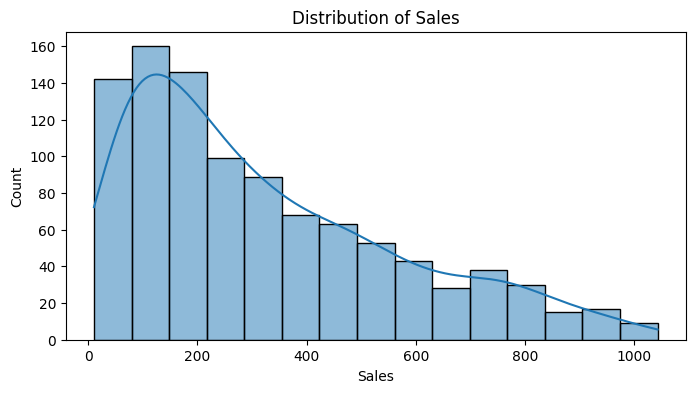

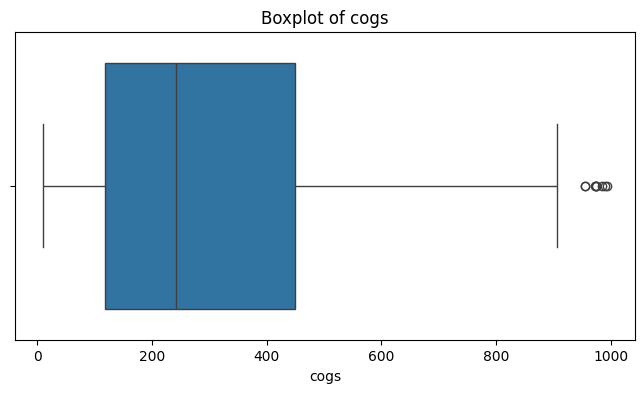

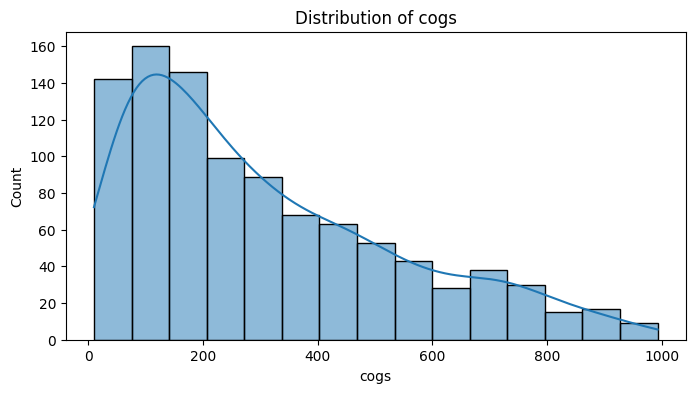

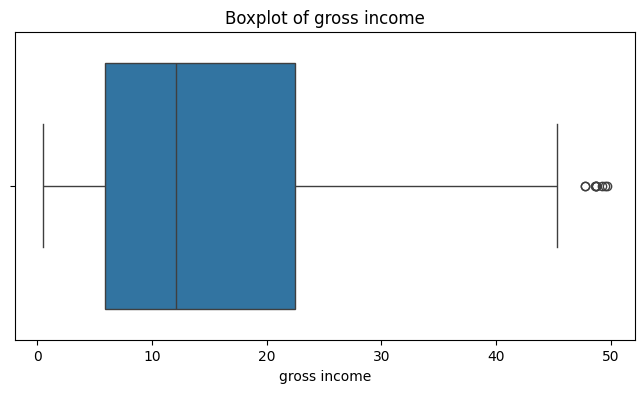

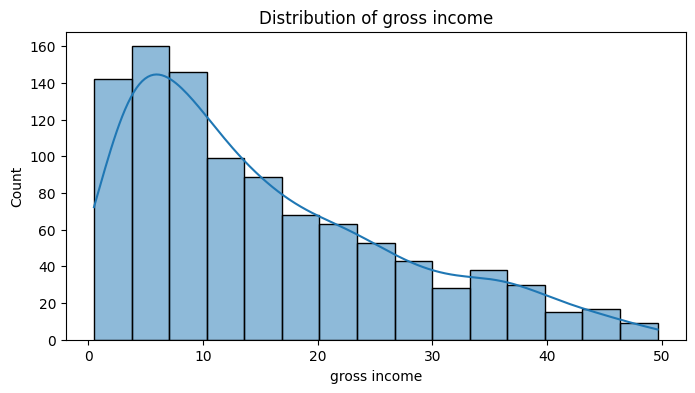

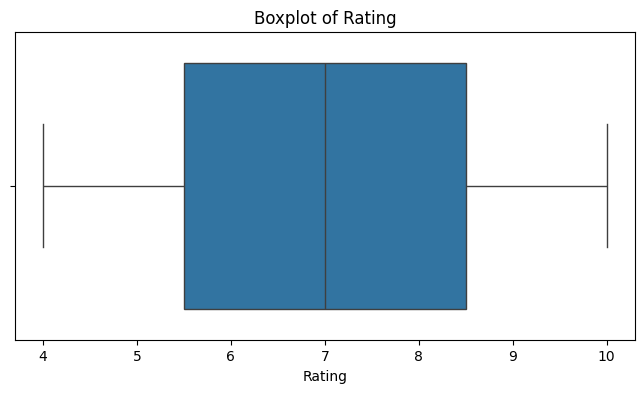

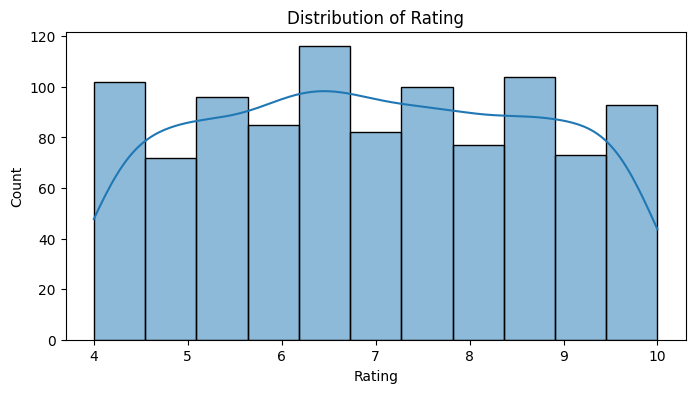

In [7]:
numeric_cols = ["Customer type", "Unit price", "Quantity", "Tax 5%", "Sales", "cogs", "gross income", "Rating"]

for col in numeric_cols:
    plt.figure(figsize= (8,4))
    sns.boxplot(x = df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

    plt.figure(figsize = (8,4))
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()

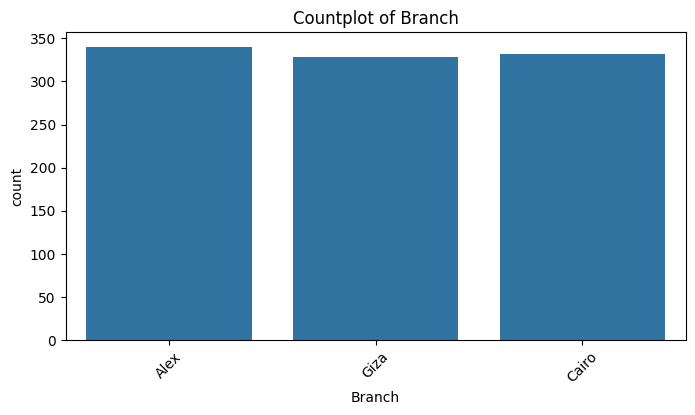

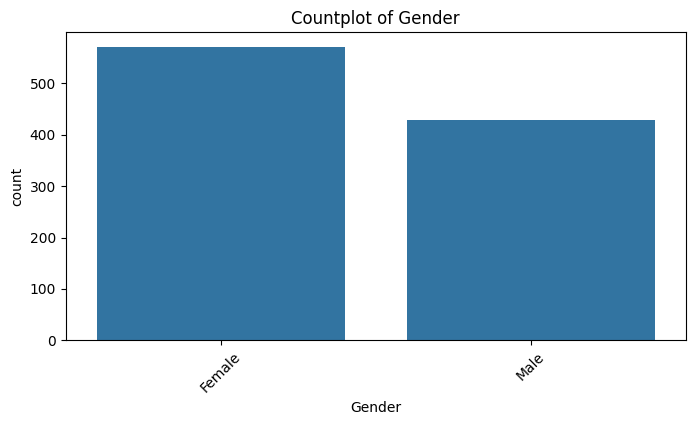

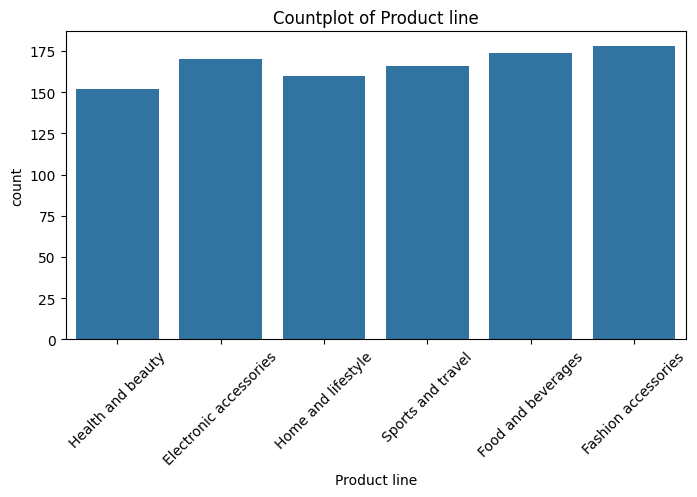

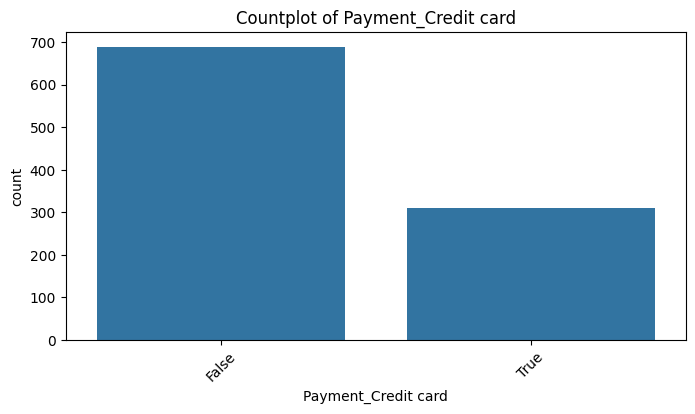

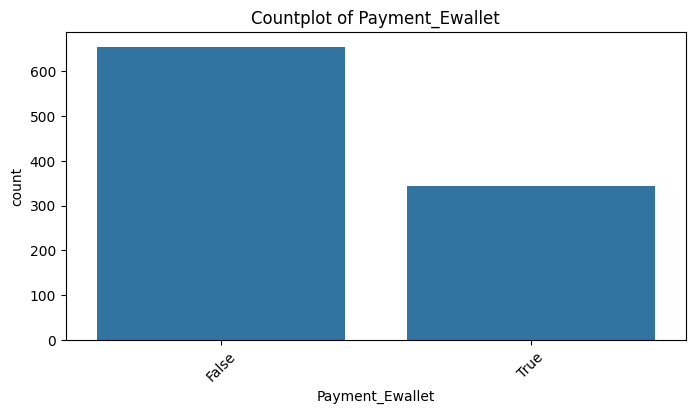

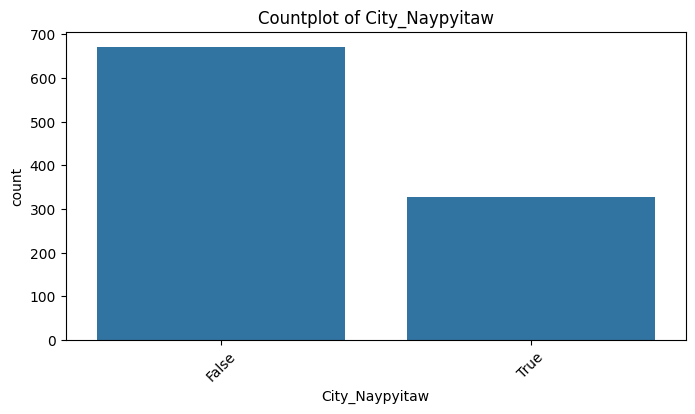

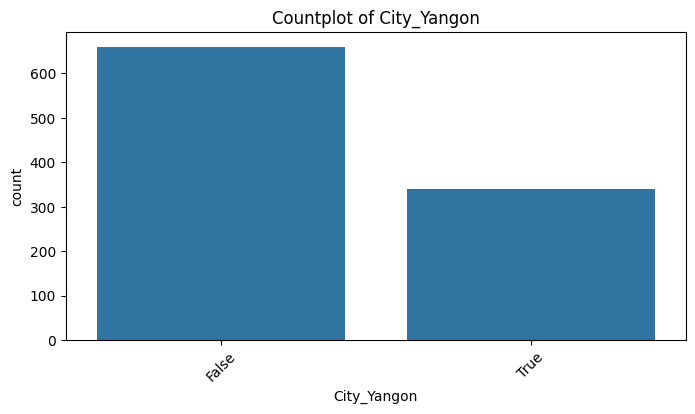

In [8]:
cat_cols = ["Branch", "Gender", "Product line", "Payment_Credit card", "Payment_Ewallet", "City_Naypyitaw", "City_Yangon"]

for col in cat_cols:
    plt.figure(figsize = (8, 4))
    sns.countplot(x = df[col])
    plt.xticks(rotation = 45)
    plt.title(f'Countplot of {col}')
    plt.show()

### ***Observations from Visualizations***

***- Unit price:*** *Distribution is fairly uniform with no extreme outliers; values range from around 10 to 100.*

***- Quantity:*** *Slight right skew; most transactions involve quantities between 3 and 8 units, with few outliers near the maximum of 10.*

***- Tax 5%:*** *Strongly right-skewed and mirrors the Sales distribution; higher tax values correspond to higher sales amounts.*

***- Sales:*** *Right-skewed distribution with a few very high-value transactions; closely correlated with cogs and gross income.*

***- Cogs:*** *Shape and range are similar to Sales, confirming their direct relationship.*

***- Gross income:*** *Matches the pattern of Tax 5% and Sales, indicating these fields are directly related.*

***- Rating:*** *Nearly normally distributed, centered around a rating of 7; few low ratings below 5 or high ratings above 9.*

***- Branch:*** *The three branches (Alex, Cairo, Giza) have nearly equal representation in the dataset.*

***- Gender:*** *Slightly more female customers compared to male customers.*

***- Payment methods:*** *E-wallet appears to be the most used, followed by credit card and then cash.*

***- Cities:*** *Distribution of sales between cities is relatively balanced, with slight variations.*

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Invoice ID           1000 non-null   object 
 1   Branch               1000 non-null   object 
 2   Customer type        1000 non-null   int64  
 3   Gender               1000 non-null   object 
 4   Product line         1000 non-null   object 
 5   Unit price           1000 non-null   float64
 6   Quantity             1000 non-null   int64  
 7   Tax 5%               1000 non-null   float64
 8   Sales                1000 non-null   float64
 9   Date                 1000 non-null   object 
 10  Time                 1000 non-null   object 
 11  cogs                 1000 non-null   float64
 12  gross income         1000 non-null   float64
 13  Rating               1000 non-null   float64
 14  Payment_Credit card  1000 non-null   bool   
 15  Payment_Ewallet      1000 non-null   bo

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,cogs,gross income,Rating,Payment_Credit card,Payment_Ewallet,City_Naypyitaw,City_Yangon
0,750-67-8428,Alex,0,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,1:08:00 PM,522.83,26.1415,9.1,False,True,False,True
1,226-31-3081,Giza,1,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-19,10:29:00 AM,76.40,3.8200,9.6,False,False,True,False
2,631-41-3108,Alex,1,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,1:23:00 PM,324.31,16.2155,7.4,True,False,False,True
3,123-19-1176,Alex,0,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,465.76,23.2880,8.4,False,True,False,True
4,373-73-7910,Alex,0,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-19,10:37:00 AM,604.17,30.2085,5.3,False,True,False,True


In [10]:
df.to_csv("supermarket_processed_d11.csv", index = False)

### ***Summary:***

*In today’s session, we explored both numerical and categorical features of the dataset, generating descriptive statistics and visualizing data distributions.*

***Key findings include:***

*- Balanced representation across branches and product lines.*

*- Numerical columns such as* *Sales*, *cogs*, *gross income*, and *Tax 5%* *show strong positive correlations, as expected from sales data.*

*- Some features like *Customer type* and *Gender* are binary/categorical, allowing for straightforward encoding.*

*- No missing values were detected, and data consistency was confirmed.*

*The cleaned and processed dataset has been saved as **`supermarket_processed.csv`** for use in upcoming modeling and advanced analysis steps.*